#### Importing the data

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Marcus Padilha\Desktop\MACHINE_LEARNING\DATABASES\07_BIOMECHANICAL_FEATURE_DATASET\column_2C_weka.csv")
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


#### Treating the data

In [2]:
data['class'].replace(['Normal','Abnormal'],[0,1], inplace = True)

#### Spliting the data

In [3]:
y = data['class']
x = data.drop('class', axis = 1)

#### Normalizing the data

In [4]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler(feature_range = (0, 1))
x_norm = normalize.fit_transform(x)

#### Importing the libraries

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [6]:
import numpy as np
from sklearn.model_selection import GridSearchCV

#### Setting parameter variations

In [7]:
min_splits = np.array([2,3,4,5,6,7,8])
max_level = np.array([3,4,5,6])
algorithm = ['gini', 'entropy']
grid_values = {'min_samples_split':min_splits, 'max_depth':max_level, 'criterion': algorithm}

#### Checking the best parameters

In [8]:
model = DecisionTreeClassifier()

In [9]:
gridDecisionTree = GridSearchCV(estimator = model,  param_grid = grid_values, cv = 5)
gridDecisionTree.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])})

In [10]:
print(f'Min Split: {gridDecisionTree.best_estimator_.min_samples_split}')
print(f'Max Depth: {gridDecisionTree.best_estimator_.max_depth}')
print(f'Selected Algorithm: {gridDecisionTree.best_estimator_.criterion}')
print(f'Accuracy: {gridDecisionTree.best_score_}')

Min Split: 2
Max Depth: 5
Selected Algorithm: entropy
Accuracy: 0.7709677419354839


#### Separating the data for training and testing

In [11]:
x_norm_train, x_norm_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.3)

#### Creating the model with the best parameters

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth = 5)

#### Training the model

In [13]:
model.fit(x_norm_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Evaluating the algorithm's accuracy

In [14]:
result = model.score(x_norm_test, y_test)
print(f'Accuracy: {result}')

Accuracy: 0.7849462365591398


#### Evaluating the prediction of the model

In [15]:
prediction = model.predict(x_norm_test)
print(prediction)

[1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1]


#### Evaluating the confusion matrix

In [16]:
matrix = confusion_matrix(y_test, prediction)
print(matrix)

[[19 11]
 [ 9 54]]


#### Evaluating the Area under the ROC curve

In [17]:
predictproba = model.predict_proba(x_norm_test)
probability = predictproba[:,1]
print(probability)

[1.         0.0625     1.         1.         1.         0.
 0.61538462 1.         1.         0.         0.         1.
 1.         1.         1.         1.         0.         1.
 1.         1.         1.         0.41176471 1.         1.
 1.         1.         0.         1.         0.0625     1.
 1.         1.         1.         0.         1.         1.
 1.         1.         1.         1.         1.         0.61538462
 0.         0.         0.0625     1.         0.         0.41176471
 1.         0.         0.61538462 0.61538462 1.         0.
 0.         1.         1.         0.         1.         0.61538462
 1.         1.         0.         1.         1.         0.
 1.         1.         1.         0.61538462 0.41176471 0.61538462
 0.25       1.         1.         1.         1.         0.
 0.         1.         1.         0.41176471 1.         1.
 1.         0.         0.0625     1.         0.         1.
 1.         1.         0.61538462]


In [18]:
fpr, tpr, thresholds = roc_curve (y_test, probability)

In [19]:
print(f'True positive rate: {tpr}')
print(f'False positive rate: {fpr}')
print(f'Thresholds: {thresholds}')

True positive rate: [0.         0.80952381 0.85714286 0.9047619  0.92063492 0.93650794
 1.        ]
False positive rate: [0.         0.2        0.36666667 0.4        0.4        0.5
 1.        ]
Thresholds: [2.         1.         0.61538462 0.41176471 0.25       0.0625
 0.        ]


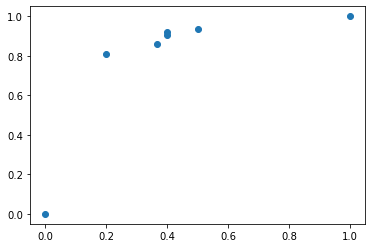

In [20]:
plt.scatter(fpr, tpr)
plt.show()

In [21]:
score = roc_auc_score(y_test, probability)
print(f'Area under the curve: {score}')

Area under the curve: 0.8261904761904761


#### Evaluating the F1 score

In [22]:
f1 =  f1_score(y_test, prediction)
print(f'F1 Score: {f1}')

F1 Score: 0.84375
